In [1]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import math
import pandas as pd
import os
print('imported!')

imported!


In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,32,3,padding=1)
        self.conv2=nn.Conv2d(32,64,3,padding=1)
        self.conv3=nn.Conv2d(64,128,3,padding=1)
        self.fc1=nn.Linear(1152,500)
        self.fc2=nn.Linear(500,100)
        self.fc3=nn.Linear(100,10)
        self.relu=nn.ReLU()#Sigmoid()#ReLU()#Sigmoid()
        self.softmax=nn.Softmax()
        self.dropout_dot5=nn.Dropout(0.5)
        self.dropout_dot4=nn.Dropout(0.4)
        self.dropout_dot3=nn.Dropout(0.3)
    def forward(self,x):
        x=self.conv1(x)
        x=F.max_pool2d(self.relu(x),(2,2))
        x=self.conv2(x)
        x=F.max_pool2d(self.relu(x),2)
        x=self.conv3(x)
        x=F.max_pool2d(self.relu(x),2)
        x=x.view(-1,self.num_flat_features(x))
        #print(x)
        x=self.dropout_dot4(x)
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    
    def num_flat_features(self,x):
        size=x.size()[1:]
        num_features=1
        for s in size:
            num_features*=s
        return num_features
        

In [3]:
#import data for training
path=os.getcwd()+'/train.csv'#/sample_submission.csv'
all_data=pd.read_csv(path)
all_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
'''
all_data.columns
all_data.index
all_data.iloc[1]
'''

'\nall_data.columns\nall_data.index\nall_data.iloc[1]\n'

In [5]:
'''
img0=all_data.iloc[20000,1:]
img0=img0.reshape((28,28))
#help(plt.imshow)#
plt.imshow(np.array(img0))
plt.show()
'''

'\nimg0=all_data.iloc[20000,1:]\nimg0=img0.reshape((28,28))\n#help(plt.imshow)#\nplt.imshow(np.array(img0))\nplt.show()\n'

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[2 0 0 ..., 0 0 0]
 [2 0 0 ..., 0 0 0]]


/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


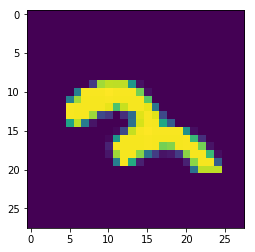

In [6]:
all_data=np.array(all_data)
#shuffle
print(all_data[0:2,:])
np.random.shuffle(all_data)
print(all_data[0:2,:])
row_num=len(all_data)
train_control=int(row_num*0.9)
valid_control=int(row_num*1)
train_data=all_data[0:train_control]
valid_data=all_data[train_control:valid_control]
#print(row_num)
#get train data in 4d
train_data_4d=np.ones((train_control,1,28,28))
for idx in range(train_control):
    train_data_4d[idx,0]=train_data[idx,1:].reshape((28,28))
    if idx==1:
        plt.imshow(np.array(train_data[idx,1:].reshape((28,28))))
        plt.show()
    
#get valid data in 4d
valid_data_4d=np.ones((valid_control-train_control,1,28,28))
for idx in range(valid_control-train_control):
    valid_data_4d[idx,0]=valid_data[idx,1:].reshape((28,28))
#print(train_data_4d)
#print(valid_data_4d)

epoch: 0/50, Loss: 33.61954736709595, valid_loss: 2.259796142578125, accuracy_rate: 0.1880952380952381


/home/hmx/anaconda3/lib/python3.5/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


epoch: 1/50, Loss: 20.96027958393097, valid_loss: 1.5124399662017822, accuracy_rate: 0.5945238095238096
epoch: 2/50, Loss: 10.766802430152893, valid_loss: 0.45426511764526367, accuracy_rate: 0.8759523809523809
epoch: 3/50, Loss: 4.51232522726059, valid_loss: 0.24351856112480164, accuracy_rate: 0.9266666666666666
epoch: 4/50, Loss: 2.7865760028362274, valid_loss: 0.16706876456737518, accuracy_rate: 0.949047619047619
epoch: 5/50, Loss: 1.9227009415626526, valid_loss: 0.12023810297250748, accuracy_rate: 0.9611904761904762
epoch: 6/50, Loss: 1.5840739980340004, valid_loss: 0.09784440696239471, accuracy_rate: 0.9661904761904762
epoch: 7/50, Loss: 1.2918021604418755, valid_loss: 0.08016441017389297, accuracy_rate: 0.9711904761904762
epoch: 8/50, Loss: 1.097970835864544, valid_loss: 0.07140838354825974, accuracy_rate: 0.9757142857142858
epoch: 9/50, Loss: 0.9603407755494118, valid_loss: 0.0623137541115284, accuracy_rate: 0.9785714285714285
epoch: 10/50, Loss: 0.8424615636467934, valid_loss: 0

/home/hmx/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


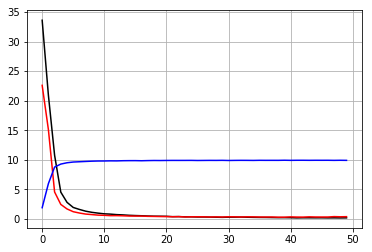

In [7]:
#model
model=Net()#188,100,50,25,3
LEARNING_RATE=0.0015
num_epochs=50
batch_div=10
#input


criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p:p.requires_grad,model.parameters()),lr=LEARNING_RATE)
#for plot
all_loss=np.zeros(num_epochs)
all_valid_loss=np.zeros(num_epochs)
all_accuracy_rate=np.zeros(num_epochs)
if os.path.exists('./models'):
    pass
else:
    os.mkdir('./models')
for epoch in range(num_epochs):
    running_loss=0
    batch_len=int(len(train_data_4d)*1.0/batch_div)
    for ii in [batch_len*x for x in range(batch_div)]:
        inputs=Variable(torch.from_numpy(train_data_4d[ii:ii+batch_len])).float()
        targets=Variable(torch.from_numpy(train_data[ii:ii+batch_len,0])).long()
        out=model(inputs)#forward
        loss=criterion(out,targets)#get loss
    
        running_loss+=loss.data[0]
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    all_loss[epoch]=running_loss
    #valid
    valid_loss=0
    
    model.eval()
    #print(valid_data_4d)
    valid_inputs=Variable(torch.from_numpy(valid_data_4d)).float()
    valid_targets=Variable(torch.from_numpy(valid_data[:,0])).long()
    valid_out=model(valid_inputs)#forward
    max_value,max_idx=torch.max(valid_out,1)
    #print(max_idx)
    accuracy_rate=sum(abs(max_idx.data.numpy()==valid_data[:,0]))/len(valid_data)
    valid_loss=criterion(valid_out,valid_targets).data[0]#get loss
    all_valid_loss[epoch]=valid_loss
    all_accuracy_rate[epoch]=accuracy_rate
    #
    model.train()
    #print
    print('epoch: {}/{}, Loss: {}, valid_loss: {}, accuracy_rate: {}'.format(epoch,num_epochs, running_loss, valid_loss, accuracy_rate))
    #model save
    torch.save(model, './models/epoch{}Loss{}valid_loss{}accuracy_rate{}.pkl'.format(epoch, running_loss,valid_loss,accuracy_rate))
    
#plot
plt.plot(range(num_epochs),all_loss,'k',range(num_epochs),10*all_valid_loss,'r',range(num_epochs), 10*all_accuracy_rate, 'b')
plt.grid(True)
plt.show()
#model save
torch.save(model, 'model.pkl')